Original Data Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Data Dictionary: 
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

Complete attribute documentation:
1 id: patient identification number
2 ccf: social security number (I replaced this with a dummy value of 0)
3 age: age in years
4 sex: sex (1 = male; 0 = female)
5 painloc: chest pain location (1 = substernal; 0 = otherwise)
6 painexer (1 = provoked by exertion; 0 = otherwise)
7 relrest (1 = relieved after rest; 0 = otherwise)
8 pncaden (sum of 5, 6, and 7)
9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
11 htn
12 chol: serum cholestoral in mg/dl
13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14 cigs (cigarettes per day)
15 years (number of years as a smoker)
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
17 dm (1 = history of diabetes; 0 = no such history)
18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
19 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
20 ekgmo (month of exercise ECG reading)
21 ekgday(day of exercise ECG reading)
22 ekgyr (year of exercise ECG reading)
23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28 proto: exercise protocol
1 = Bruce
2 = Kottus
3 = McHenry
4 = fast Balke
5 = Balke
6 = Noughton
7 = bike 150 kpa min/min (Not sure if "kpa min/min" is what was written!)
8 = bike 125 kpa min/min
9 = bike 100 kpa min/min
10 = bike 75 kpa min/min
11 = bike 50 kpa min/min
12 = arm ergometer
29 thaldur: duration of exercise test in minutes
30 thaltime: time when ST measure depression was noted
31 met: mets achieved
32 thalach: maximum heart rate achieved
33 thalrest: resting heart rate
34 tpeakbps: peak exercise blood pressure (first of 2 parts)
35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
36 dummy
37 trestbpd: resting blood pressure
38 exang: exercise induced angina (1 = yes; 0 = no)
39 xhypo: (1 = yes; 0 = no)
40 oldpeak = ST depression induced by exercise relative to rest
41 slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
42 rldv5: height at rest
43 rldv5e: height at peak exercise
44 ca: number of major vessels (0-3) colored by flourosopy
45 restckm: irrelevant
46 exerckm: irrelevant
47 restef: rest raidonuclid (sp?) ejection fraction
48 restwm: rest wall (sp?) motion abnormality
0 = none
1 = mild or moderate
2 = moderate or severe
3 = akinesis or dyskmem (sp?)
49 exeref: exercise radinalid (sp?) ejection fraction
50 exerwm: exercise wall (sp?) motion
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
52 thalsev: not used
53 thalpul: not used
54 earlobe: not used
55 cmo: month of cardiac cath (sp?) (perhaps "call")
56 cday: day of cardiac cath (sp?)
57 cyr: year of cardiac cath (sp?)
58 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

Note 1: Electronic Health Record (EHR) data that you pull from Epic, Cerner, McKesson, Meditech, Allscripts, and eCW will take considerable cleaning. Unless the data engineering team does intense pre-processing and pipeline establishment for you, be prepared to work extensively before getting to the point below. 

Note 2: Be very specific and understand the EHR data design structure before firing off Structured Query Language (SQL) commands. You will miss ICD-10 codes and other essential variables to build a reasonable prediction model. 

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
xgb.set_config(verbosity=0)
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import eli5
from eli5.sklearn import PermutationImportance
from mpl_toolkits.mplot3d import Axes3D
import warnings
import shap
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from xgboost import plot_importance

In [2]:
HeartDisease = pd.read_csv("heart.csv")

In [3]:
HeartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The idea behind establishing what the target variable looks like early on in machine learning helps check for three items: 
1. Did you establish the correct target variable during data pre-processing?
2. Did you complete this particular feature engineering task appropriately? 
3. Did you consider the balance of your dataset?

In [4]:
Target_Variable = HeartDisease.groupby("target").size()
Target_Variable

target
0    138
1    165
dtype: int64

In [5]:
Patient_Sex = HeartDisease.groupby(["sex","target"]).size()
Patient_Sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

Nice visual breakdown of the patietns with no heart disease (Target==0) and with heart disease (Target==1). If running on native data (Came directly from the EHR's morning/daily ETL process (Accomplished through Apache Airflow or your tool of choice), you will have specific data cleaning considerations: you would have 12 ICD-10 codes to consider for analysis: https://www.sonoraquest.com/media/1305/icd-10cardio_0417-2.pdf) If you have a working relationship with a Cardiologist, please consult them as more than 12 ICD-10 codes code exist. 

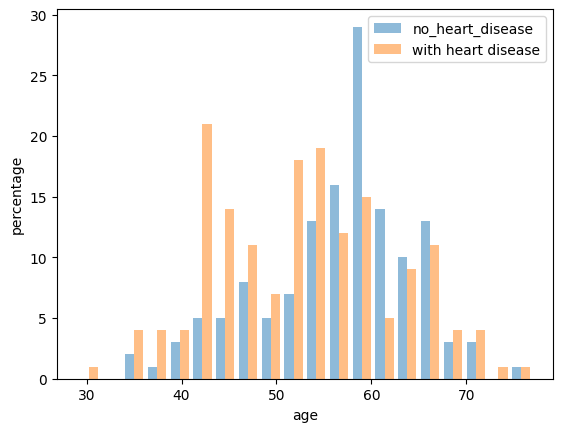

In [6]:
plt.hist([HeartDisease[HeartDisease.target==0].age, HeartDisease[HeartDisease.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

What this graphic shows is the prevalence of heart disease by maximum heart rate observed during the patients visit.

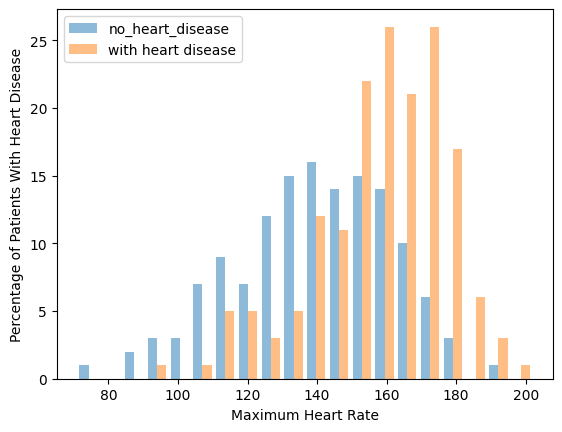

In [7]:
plt.hist([HeartDisease[HeartDisease.target==0].thalach, HeartDisease[HeartDisease.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Percentage of Patients With Heart Disease")
plt.legend()
plt.show()

If we look at a quick resource from the Mayo Clinic: https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601, we see that desirable total cholesterol is below 200 mg/dl. Again, involve your physicians and provider team in coming to any form of baseline conclusions (Baseline conclusions defined: A conclusion or estimation that includes medically sound judgment). 

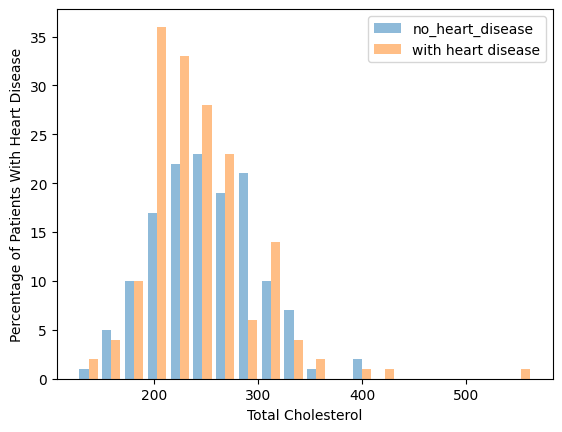

In [8]:
plt.hist([HeartDisease[HeartDisease.target==0].chol, HeartDisease[HeartDisease.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Total Cholesterol")
plt.ylabel("Percentage of Patients With Heart Disease")
plt.legend()
plt.show()

Always throw in a nice set of summary statistics. Count means number of patients (N=303 in this dataset). If you are working with larger datasets (N=100,000 or more patient records), Count comes in handy to make sure you have consistency during pre-processing. 

In [9]:
HeartDiseaseBreakdown = HeartDisease[["age", "trestbps", "chol", "thalach", "oldpeak"]]
HeartDiseaseBreakdown.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


The outliers are defined as not in the range of 3 Sigma (3 Standard Deviations away from the mean). Those outliers are removed by utilizing the following process.

Note: If you can find a better way to perform this task, do so, as the code can be a bit cumbersome. 

In [10]:
Final = HeartDisease.describe()

OutlierRemoval1 = HeartDisease[HeartDisease.trestbps < Final.loc["mean", "trestbps"] + 3 * Final.loc["std", "trestbps"]]
OutlierRemoval2 = OutlierRemoval1[HeartDisease.chol < Final.loc["mean", "chol"] + 3 * Final.loc["std", "chol"]]
OutlierRemoval3 = OutlierRemoval2[HeartDisease.thalach > Final.loc["mean", "thalach"] - 3 * Final.loc["std", "thalach"]]
NewDataFrame = OutlierRemoval3[HeartDisease.oldpeak < Final.loc["mean", "oldpeak"] + 3 * Final.loc["std", "oldpeak"]]
NewDataFrame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
NewDataFrame.cp = NewDataFrame.cp.map({0:"asymptomatic", 1: "typical angina", 2:"atypical angina", 3:"non-anginal pain"})
NewDataFrame.sex = NewDataFrame.sex.map({0:"Female", 1:"Male"}) 
NewDataFrame.exang = NewDataFrame.exang.map({0:"exercise did not induce angina", 1:"exercise induced angina"})
NewDataFrame.slope = NewDataFrame.slope.map({1:"upsloping", 2:"flat", 3:"downsloping"})
NewDataFrame.thal = NewDataFrame.thal.map({1:"normal",2:"fixed defect", 3:"reversable defect"})
NewDataFrame = pd.get_dummies(NewDataFrame, drop_first = True)
NewDataFrame.head(20)

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,target,sex_Male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,exang_exercise induced angina,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,1,0,150,2.3,0,1,1,0,1,0,0,0,1,0
1,37,130,250,0,1,187,3.5,0,1,1,1,0,0,0,0,0,0
2,41,130,204,0,0,172,1.4,0,1,0,0,0,1,0,0,0,0
3,56,120,236,0,1,178,0.8,0,1,1,0,0,1,0,0,0,0
4,57,120,354,0,1,163,0.6,0,1,0,0,0,0,1,0,0,0
5,57,140,192,0,1,148,0.4,0,1,1,0,0,0,0,1,1,0
6,56,140,294,0,0,153,1.3,0,1,0,0,0,1,0,1,0,0
7,44,120,263,0,1,173,0.0,0,1,1,0,0,1,0,0,0,1
8,52,172,199,1,1,162,0.5,0,1,1,1,0,0,0,0,0,1
9,57,150,168,0,1,174,1.6,0,1,1,1,0,0,0,0,0,0


Although humble Python code, never forget to define your training and testing data sets!

In [12]:
X = NewDataFrame.drop("target", 1).values
y = NewDataFrame["target"].astype("int").values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=10)

In [13]:
Model = XGBClassifier()
Parameters = dict(model_max_depth=[3,5,7], model_learning_rate=[0.001,0.01, 0.1], model_n_estimators=[100,500])

CV = GridSearchCV(Model, param_grid=Parameters, cv=10)
print (CV.param_grid)
CV

{'model_max_depth': [3, 5, 7], 'model_learning_rate': [0.001, 0.01, 0.1], 'model_n_estimators': [100, 500]}


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

This code fits the model and shows the best prediction path. 

Note: I need to keep fooling around with the verbosity and silent functionality so I can supress the XGBoost warnings below: https://stackoverflow.com/questions/58318685/how-to-hide-warnings-from-xgboost-library-in-jupyter

In [14]:
CV.fit(X_train, y_train) 
test_pred = CV.predict(X_test) 
CV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, model_learning_rate=0.001,
              model_max_depth=3, model_n_estimators=100,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

The number 0.811 (I rounded to two demical places) indicates that the model has an 81.10% accuracy measure. 81.10% is absolutely nothing to write home about or trot out in front of your Cardiology team saying you found the next great machine learning model.

In [15]:
max_depth_of_model = CV.best_estimator_.max_depth
best_learning_rate = CV.best_estimator_.learning_rate
best_estimator = CV.best_estimator_.n_estimators
best_reg_lambda = CV.best_estimator_.reg_lambda

Model = XGBClassifier(max_depth=max_depth_of_model, learning_rate=best_learning_rate, n_estimators= best_estimator,n_jobs=1, eval_metric='logloss')
Model.fit(X_train, y_train)
yhat = Model.predict(X_test)
y_proba = Model.predict_proba(X_test)[:, 1]
importances = CV.best_estimator_.feature_importances_
accuracy_score(yhat,y_test)

0.8108108108108109

In [16]:
SortImportances = np.argsort(importances)[::-1]
SortImportances

array([ 7, 15, 13,  6,  9, 11, 12,  8,  4,  0, 10,  5,  1,  2,  3, 14],
      dtype=int64)

What model feature is the most important? Great to create a feature dictionary and determine the order. 

In [17]:
Feature_Dictionary = dict()
for idx in SortImportances:
    Feature_Dictionary[list(NewDataFrame.drop("target",1).columns)[idx]] = float(importances[idx])
Feature_Dictionary

{'ca': 0.16961419582366943,
 'thal_reversable defect': 0.13969388604164124,
 'slope_upsloping': 0.09882558137178421,
 'oldpeak': 0.09191208332777023,
 'cp_atypical angina': 0.08676931262016296,
 'cp_typical angina': 0.0726226270198822,
 'exang_exercise induced angina': 0.04939056932926178,
 'sex_Male': 0.04933537542819977,
 'restecg': 0.04547272250056267,
 'age': 0.03845725581049919,
 'cp_non-anginal pain': 0.03785897418856621,
 'thalach': 0.035702235996723175,
 'trestbps': 0.03478841111063957,
 'chol': 0.025090908631682396,
 'fbs': 0.024465812370181084,
 'thal_normal': 0.0}

The number of arteries colored by fluoroscopy (ca in the data set) was the most important feature followed by reversible Thalassemia defect. It is nice to see the Feature Importance visualized for easy scanning followed by simple explainations. 

Technical Note 1: Thalassemia (thal in this dataset) condition overview:https://www.mayoclinic.org/diseases-conditions/thalassemia/symptoms-causes/syc-20354995.

Technical Note 2: 
In cardiac catheterization , fluoroscopy is used as an adjunct to enable the doctor to see the flow of blood through the coronary arteries in order to evaluate the presence of arterial blockages (Source: https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/fluoroscopy-procedure). 

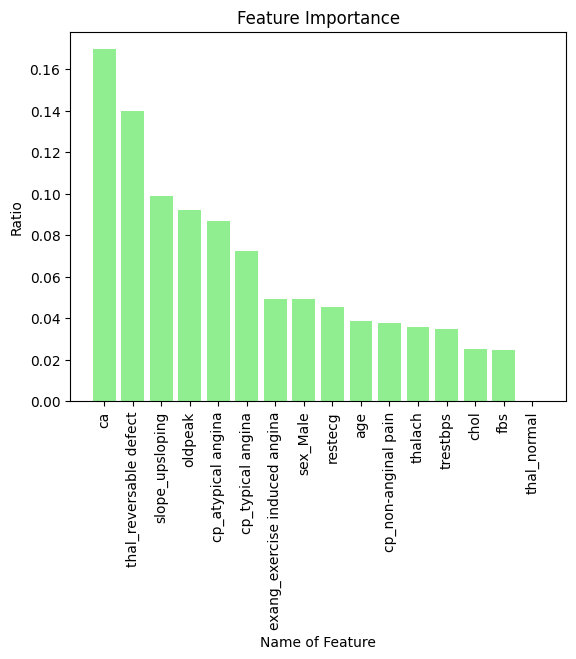

In [18]:
y_pos = np.arange(len(Feature_Dictionary.keys()))
plt.bar(y_pos, list(Feature_Dictionary.values()), align = "center",color = "lightgreen")
plt.xticks(y_pos, list(Feature_Dictionary.keys()), rotation = 90)
plt.xlabel("Name of Feature")
plt.ylabel("Ratio")
plt.title("Feature Importance")
plt.show()

A confusion matrix has four parts (True Positive (tp), False Negative (fn), False Positive (fp), and True Negative(TN)). Article link for text below: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

True Positive:
Interpretation: You predicted positive and it’s true.
You predicted that a woman is pregnant and she actually is.

True Negative:
Interpretation: You predicted negative and it’s true.
You predicted that a man is not pregnant and he actually is not.

False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.
You predicted that a man is pregnant but he actually is not.

False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.
You predicted that a woman is not pregnant but she actually is.

In [19]:
tp,fn,fp,tn = confusion_matrix(y_test, yhat, labels=[1,0]).ravel()
tp,tn,fp,fn

(32, 28, 13, 1)

What the script below is telling Python goes something like this: Please set up tp, fn, fp, and tn to have a True and Predicted label. The plot (plt in the code) is informing Python to make tick marks on the X and Y axes. Itertools allows a centered horizontal alignment and specific colors you see in the next line of code that actually visualizes the confusion matrix itself. 

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return ""

Here is the visualization of the Confusion Matrix. Lets get to the fun stuff where we calculate precision and recall rates (Precision, Recall, and Accuracy are discussed in the previous article link). 

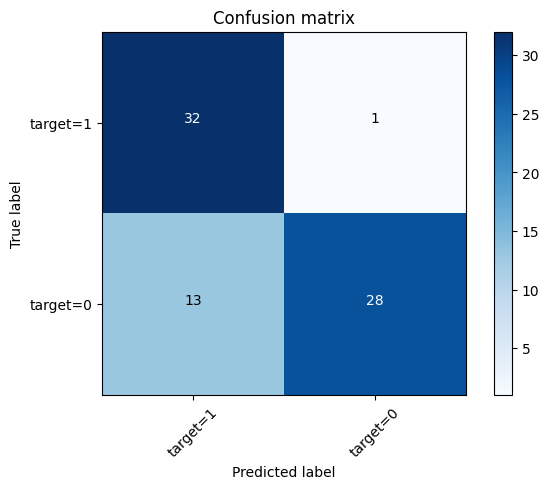

In [21]:
Confusion = confusion_matrix(y_test, yhat, labels=[1,0])
print(plot_confusion_matrix(Confusion, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix'))

Not a fan of this model's precision rate of 71.11%. That number flat out sucks. The recall rate of 96.96% is nice, but who really cares since the precision rate is 71.11%. 

In [22]:
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)

The precision rate is:  0.7111111111111111
The recall rate is:  0.9696969696969697


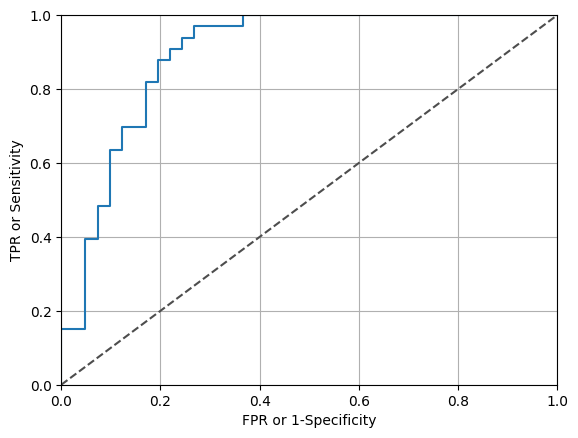

In [23]:
fpr, tpr, threshold =roc_curve(y_test, y_proba)
fig, ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot([0,1], [0,1], transform = ax.transAxes, ls="--", c="0.3")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel("FPR or 1-Specificity")
plt.ylabel("TPR or Sensitivity")
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.show()

An Area Under the Curve (AUC) of 0.89 is near the excellent range. Again, I do not like this model's precision of 71%. Not a fan of it whatsover. A future project with the heart disease data will look at improving the metrics and another avenue of analysis. 

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example (Source: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc). 

AUC Additional Explanation: https://www.sciencedirect.com/science/article/pii/S1556086415306043#:~:text=AUC%20can%20be%20computed%20using%20the%20trapezoidal%20rule.&text=In%20general%2C%20an%20AUC%20of,than%200.9%20is%20considered%20outstanding.

In [24]:
auc(fpr, tpr)

0.893569844789357

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

Source: https://scikit-learn.org/stable/modules/permutation_importance.html

Similar to a few lines above the number of arteries colored by fluoroscopy (ca in the data set) was the most important feature followed by reversible Thalassemia defect remain the most importance features of the model. 

In [25]:
Permutations = PermutationImportance(Model, random_state=1).fit(X_test, y_test)
eli5.show_weights(Permutations, feature_names = NewDataFrame.drop("target", 1).columns.tolist())

Weight,Feature
0.0703 ± 0.0878,ca
0.0351 ± 0.0276,thal_reversable defect
0.0297 ± 0.0202,sex_Male
0.0135 ± 0.0171,slope_upsloping
0.0081 ± 0.0405,oldpeak
0.0081 ± 0.0132,trestbps
0.0081 ± 0.0216,thalach
0.0054 ± 0.0132,cp_typical angina
0.0027 ± 0.0108,exang_exercise induced angina
0.0027 ± 0.0108,cp_non-anginal pain


Brief project after a few hours of work. Yes, I did have to go to an old friend in StackOverflow and doing lots of reading to parse out solid variable definitions. You can take a lot of approaches with this UCI dataset to build machine learning models to predict the prevalence of heart disease.

I hope this brief project gives you some inspiration to start branching out and build machine learning models. 

Final Note: Always remember to include your physicians and provider team in building machine learning models in the healthcare environment. 